In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE


In [55]:
# Configuraciones generales
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

# Modelo actual con mejor resultado.
- Atributo class_weight='balanced'
- random_state=25
- Sólo las columnas:  ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']
- Valores 0 sustituidos por la mediana excepto en: Insulin y Pregnancies 


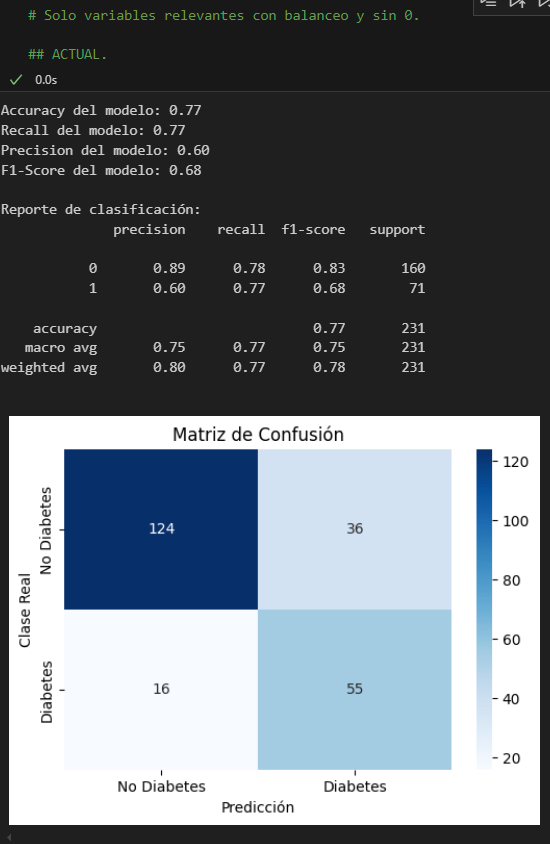

In [56]:
# 1. Cargar el archivo CSV

data = pd.read_csv("diabetes.csv")
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [57]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

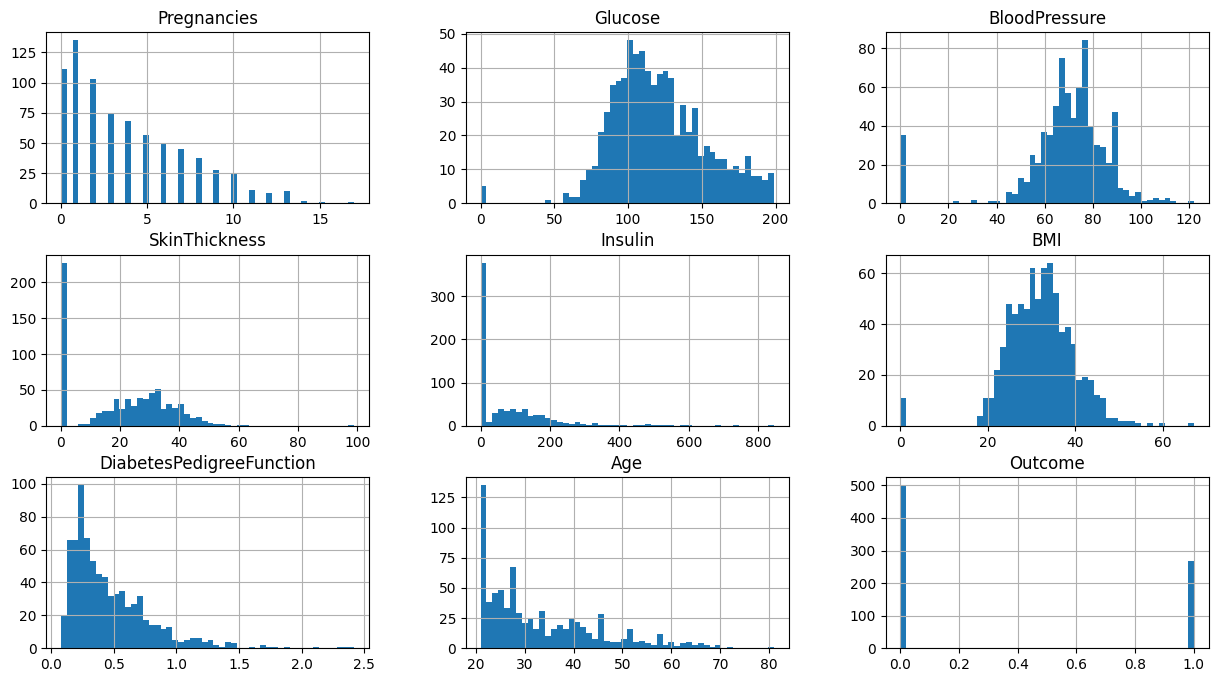

In [58]:
data.hist(bins=50, figsize=(15,8))

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


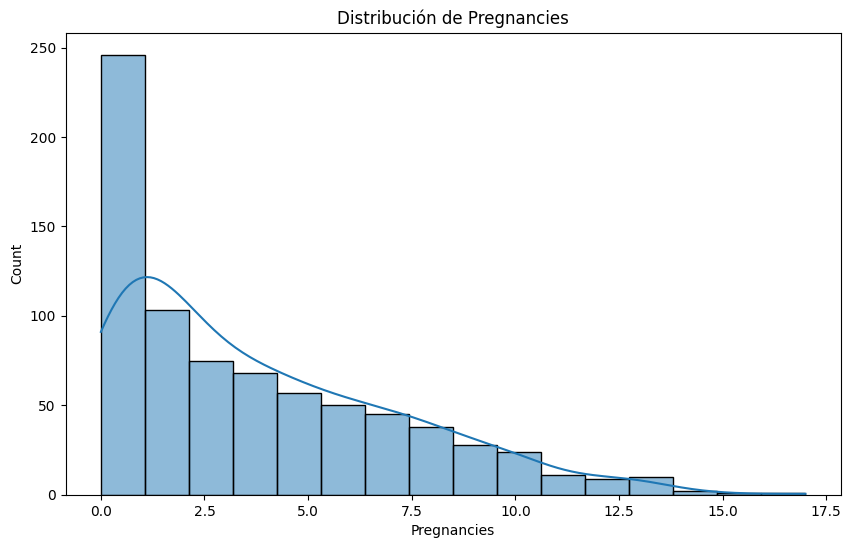

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


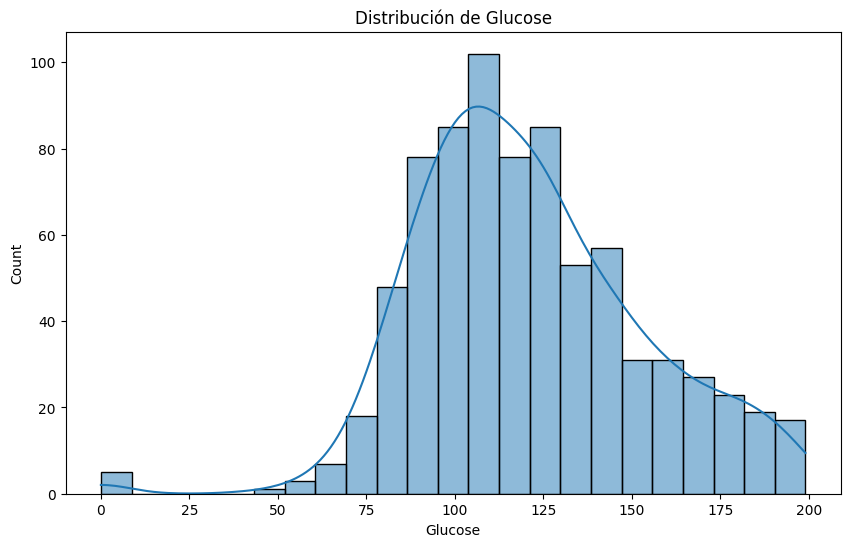

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


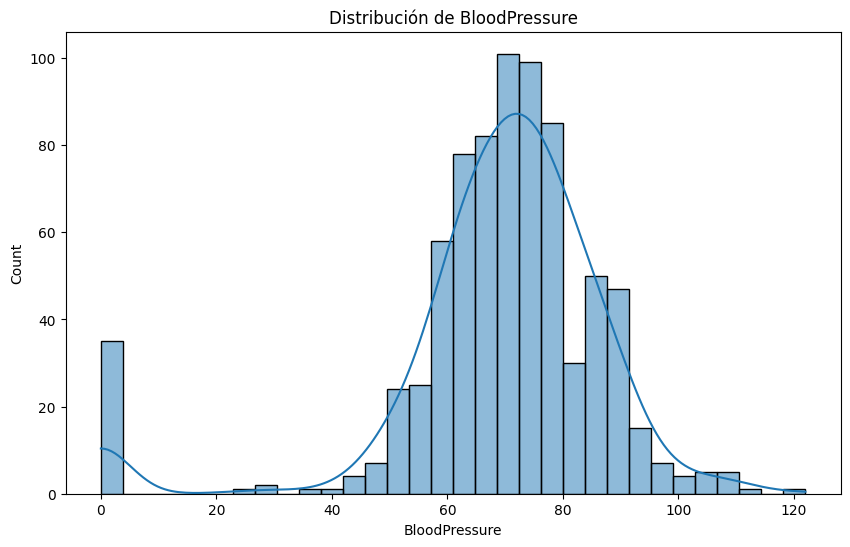

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


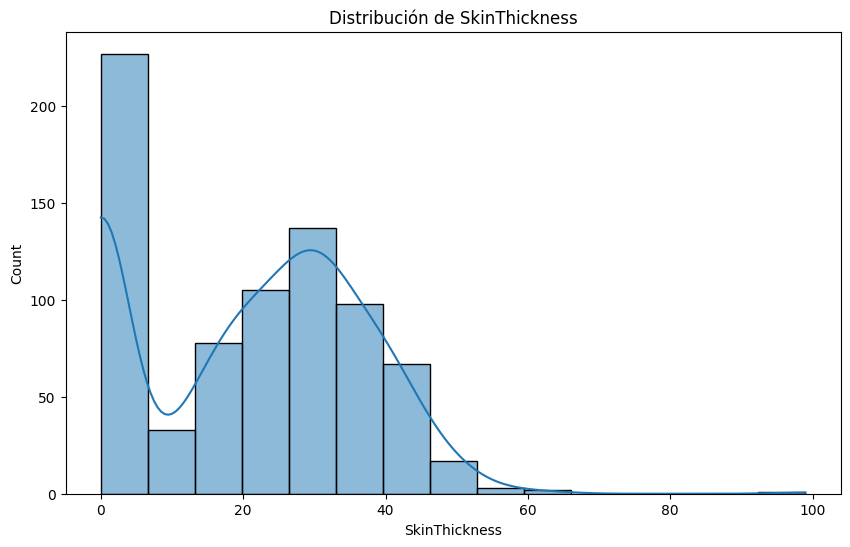

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


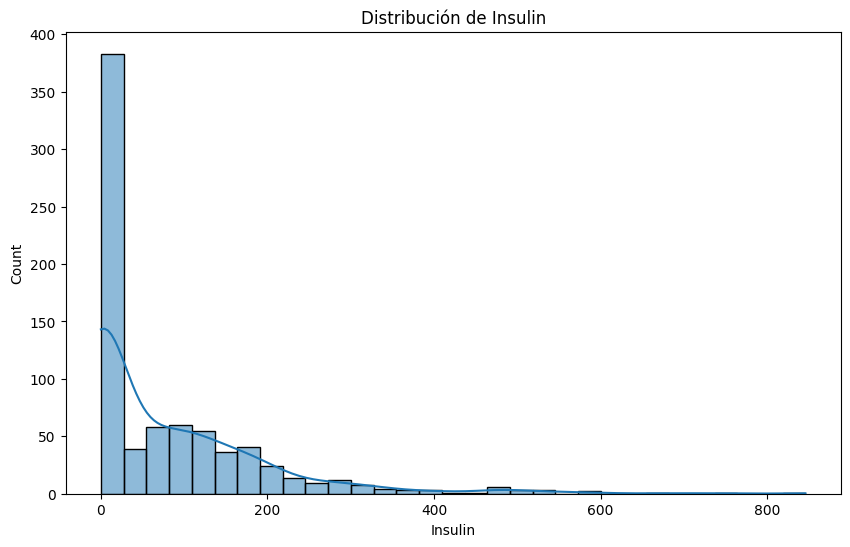

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


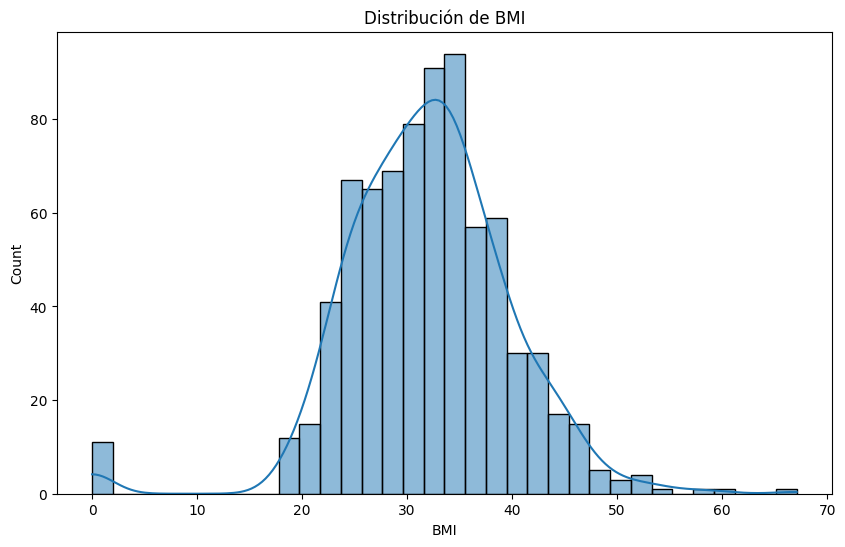

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


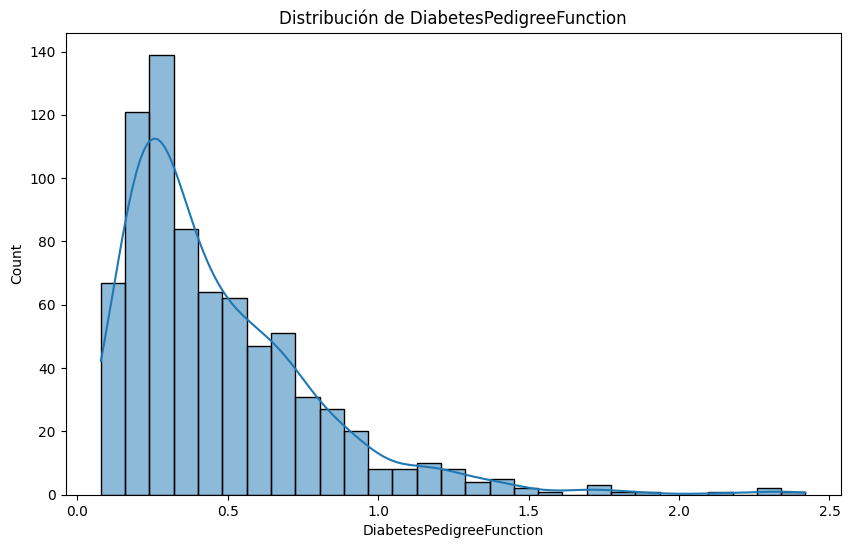

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


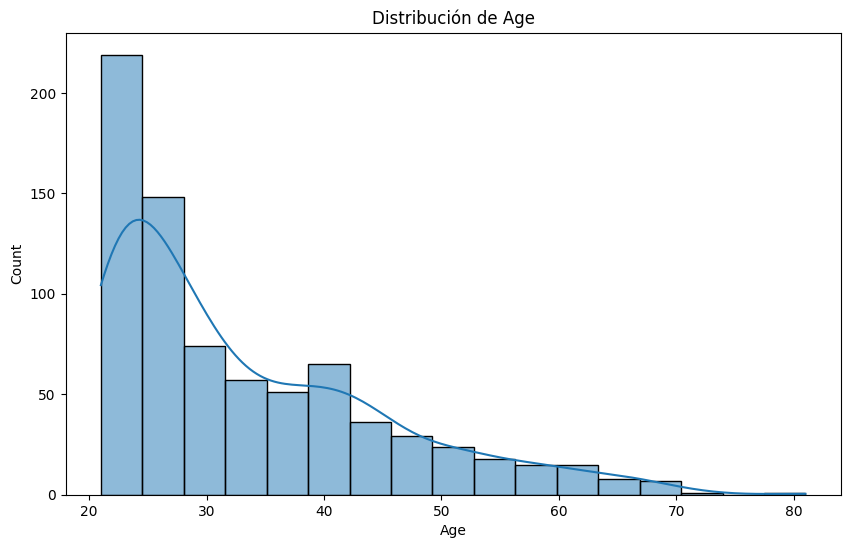

In [59]:
for col in data.columns[:-1]:  # Excluir Outcome
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

In [60]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

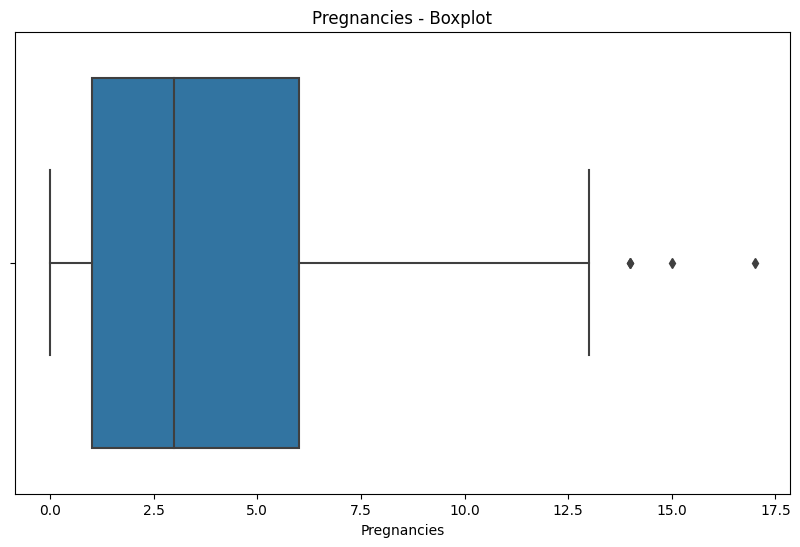

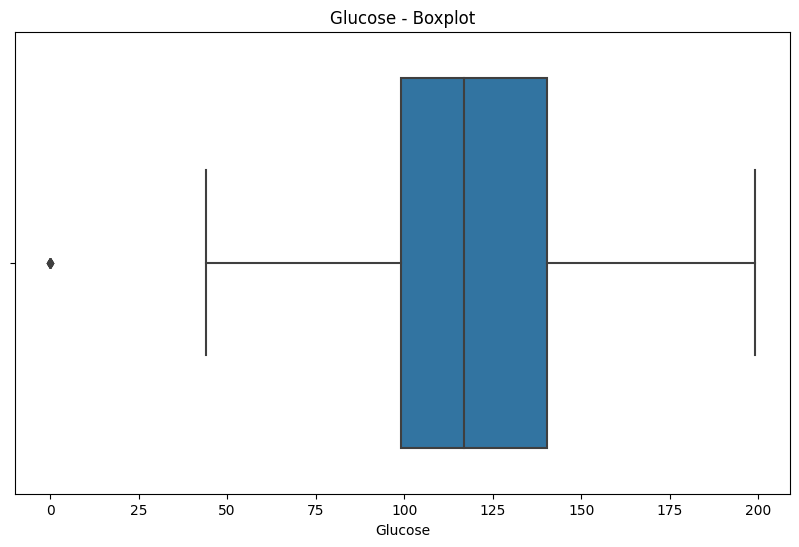

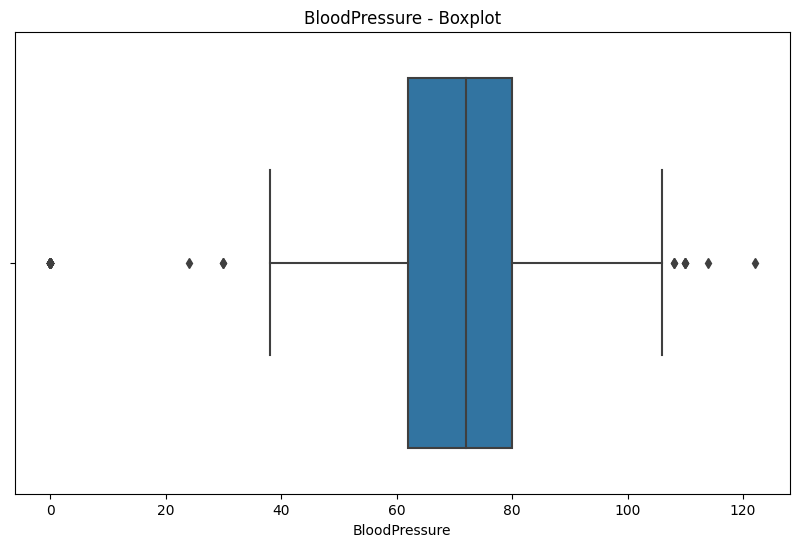

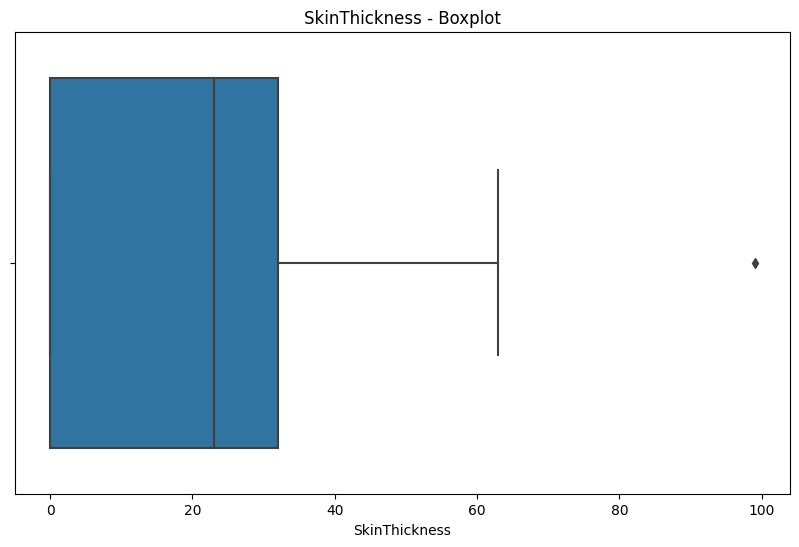

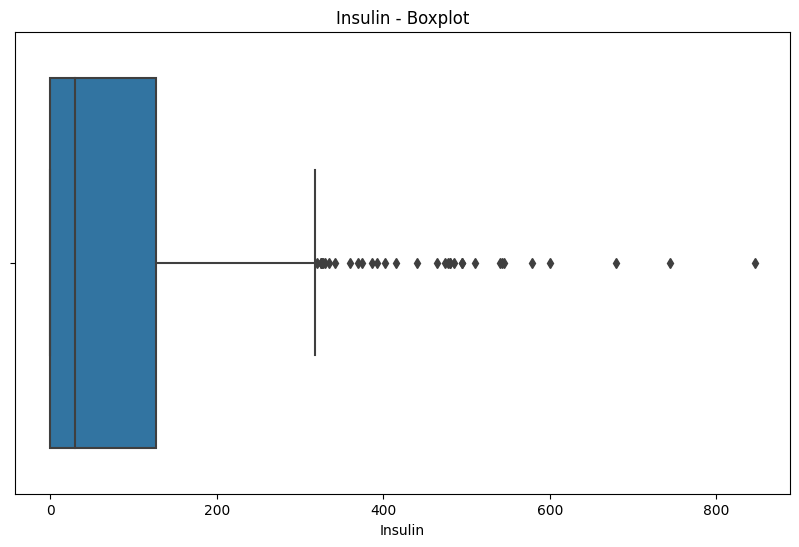

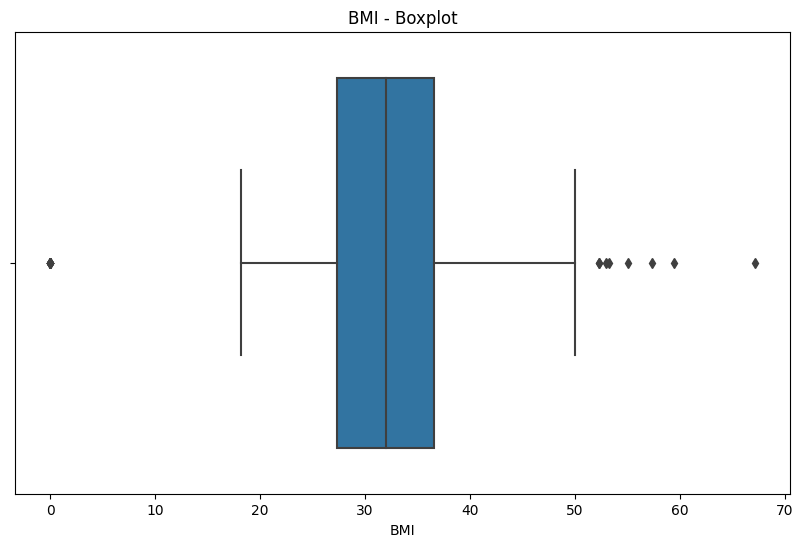

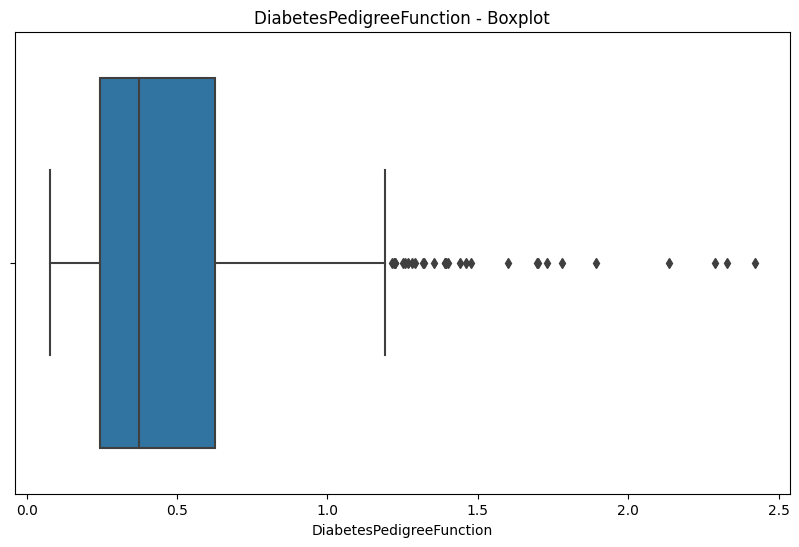

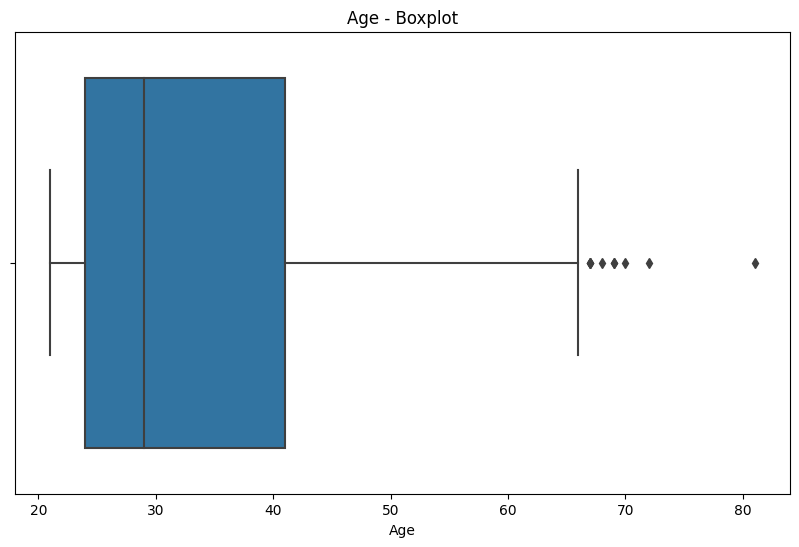

In [61]:
for col in data.columns[:-1]:
    sns.boxplot(x=data[col])
    plt.title(f'{col} - Boxplot')
    plt.show()


In [62]:
# Supongamos que el dataframe se llama `data`
correlation = data.corr()

# Extraemos las correlaciones con la variable 'Outcome'
outcome_correlation = correlation['Outcome'].drop('Outcome')  # Excluir la autocorrelación

# Ordenamos las variables por la magnitud de la correlación
outcome_correlation_sorted = outcome_correlation.abs().sort_values(ascending=False)

print(outcome_correlation_sorted)


Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


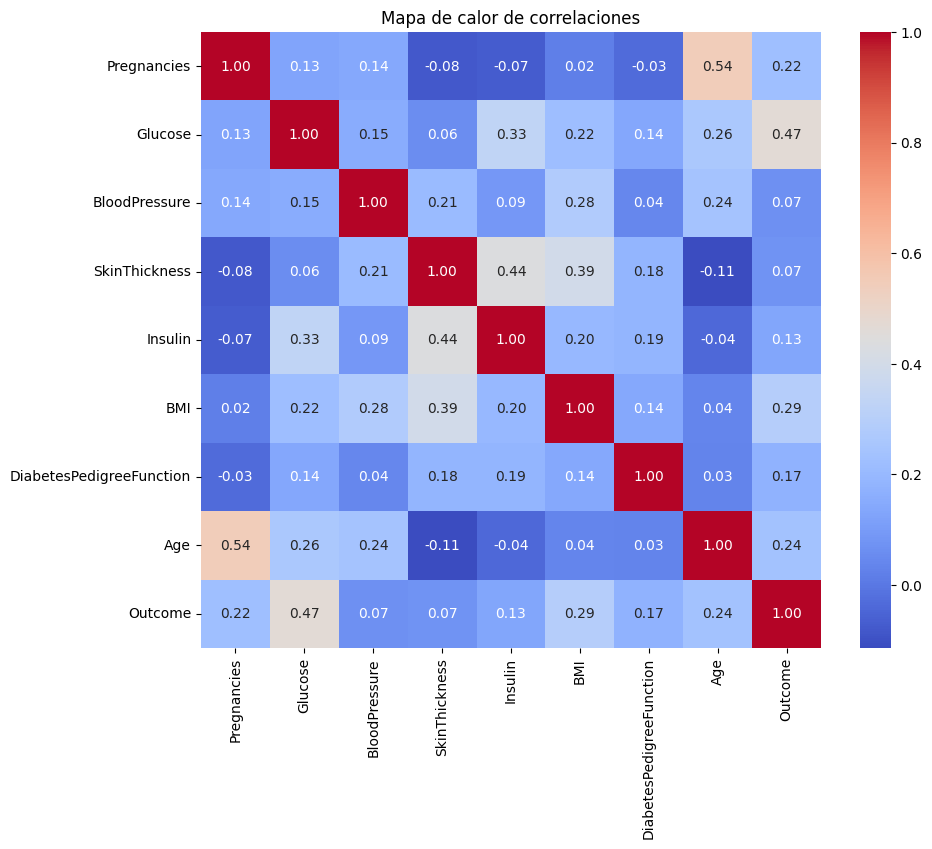

In [63]:
# Mapa de calor de las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones')
plt.show()

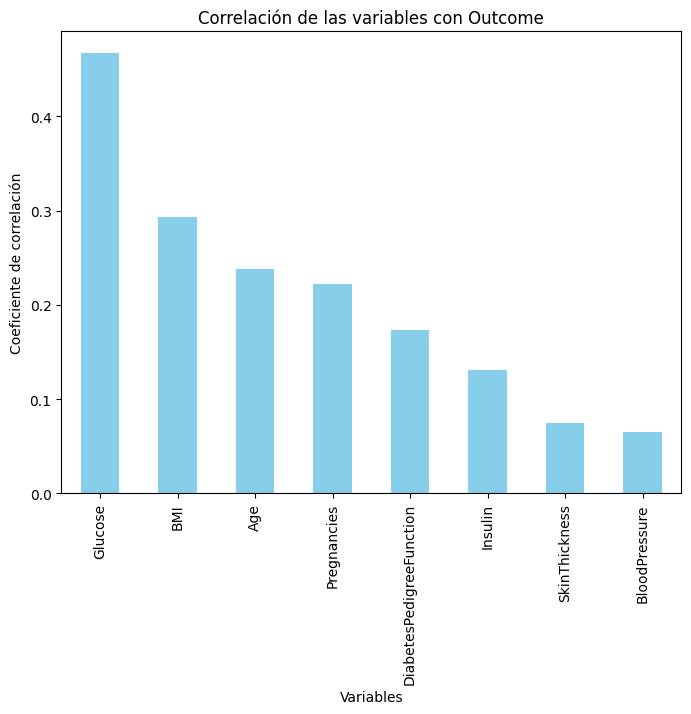

In [64]:
# Calculamos la matriz de correlación
correlation = data.corr()

# Extraemos las correlaciones con Outcome
outcome_correlation = correlation['Outcome'].drop('Outcome')

# Graficamos
plt.figure(figsize=(8, 6))
outcome_correlation.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Correlación de las variables con Outcome')
plt.ylabel('Coeficiente de correlación')
plt.xlabel('Variables')
plt.show()


/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pablost/Bootcam

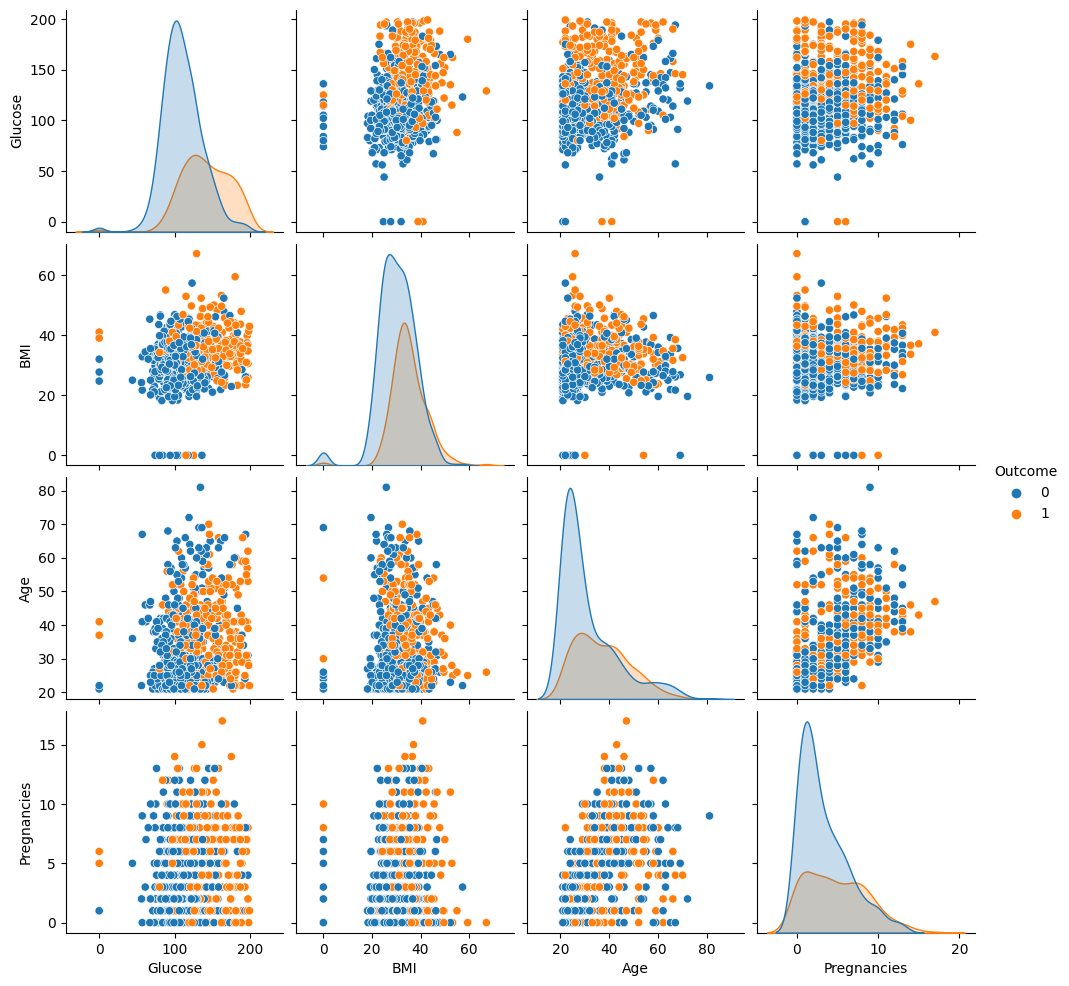

In [65]:
sns.pairplot(data, vars=['Glucose', 'BMI', 'Age', 'Pregnancies'], hue='Outcome')
plt.show()


/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pablost/Bootcam

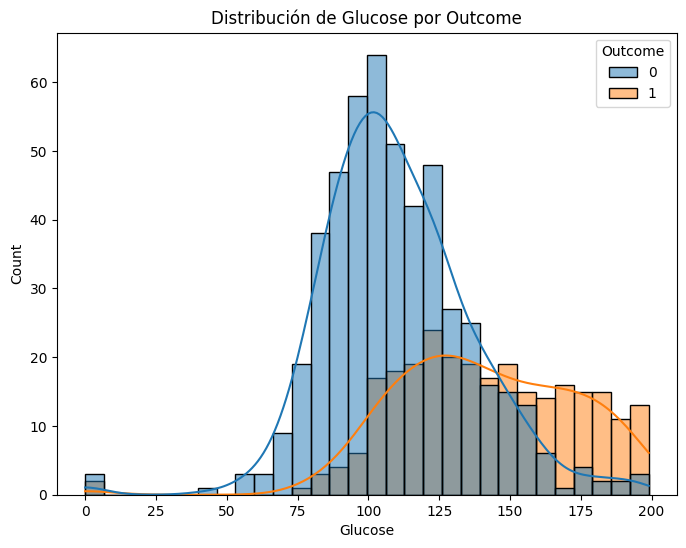

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


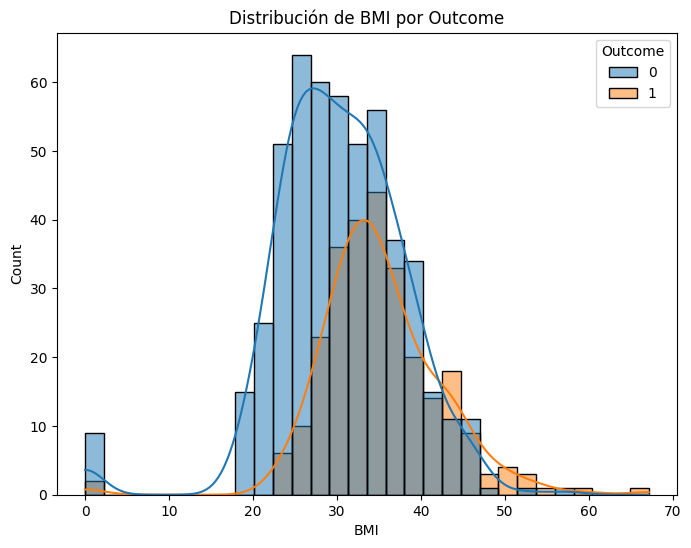

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pablost/Bootcam

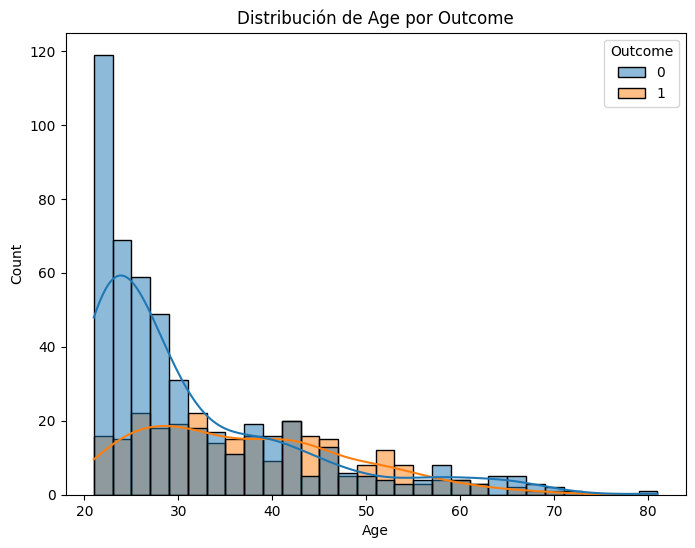

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pablost/Bootcam

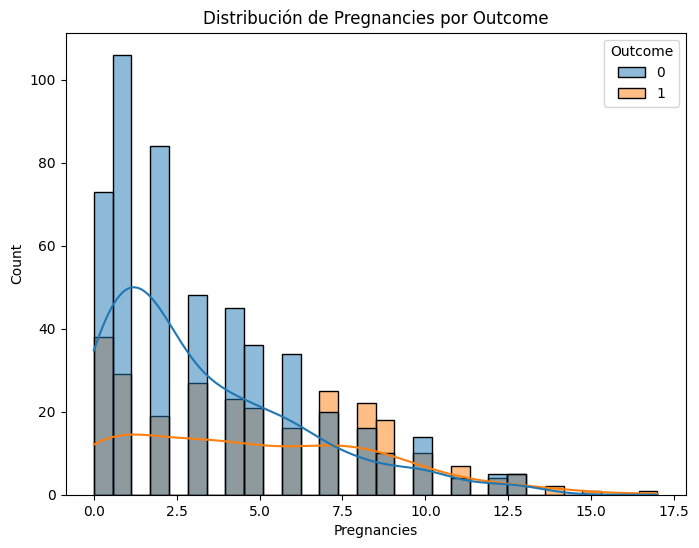

In [66]:
variables = ['Glucose', 'BMI', 'Age', 'Pregnancies']
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data, x=var, hue='Outcome', kde=True, bins=30)
    plt.title(f'Distribución de {var} por Outcome')
    plt.show()

In [67]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
# Lista de columnas donde no se esperan valores de 0 
columnas_con_ceros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"] 
# Contar cuántos ceros hay en cada una de estas columnas 
# 
valores_ceros = (data[columnas_con_ceros] == 0).sum() # Mostrar el resultado print(valores_ceros)
valores_ceros

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [69]:
# Calcular el porcentaje de ceros
porcentaje_ceros = (valores_ceros / data.shape[0]) * 100

# Mostrar el resultado
print(porcentaje_ceros)

Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64


In [70]:
# Calcular la media de los valores no nulos y diferentes de 0 en Insulin
data2 = data.copy()


In [71]:
# Calcular la media de los valores no nulos y diferentes de 0 en Insulin

median_glucose = data2.loc[data['Glucose'] != 0, 'Glucose'].median()


# Reemplazar los valores de 0 por la media
data2['Glucose'] = data2['Glucose'].replace(0, median_glucose)

data2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
# Calcular la media de los valores no nulos y diferentes de 0 en Insulin
median_SkinThickness = data2.loc[data['SkinThickness'] != 0, 'SkinThickness'].median()

# Reemplazar los valores de 0 por la media
data2['SkinThickness'] = data2['SkinThickness'].replace(0, median_SkinThickness)

data2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,69.105469,29.108073,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,19.355807,8.791221,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,25.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [73]:
# Calcular la media de los valores no nulos y diferentes de 0 en Insulin
median_insulin = data2.loc[data['BloodPressure'] != 0, 'BloodPressure'].median()


# Reemplazar los valores de 0 por la media
data2['BloodPressure'] = data2['BloodPressure'].replace(0, median_insulin)

data2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [74]:
# Calcular la media de los valores no nulos y diferentes de 0 en Insulin
median_insulin = data2.loc[data['BMI'] != 0, 'BMI'].median()


# Reemplazar los valores de 0 por la media
data2['BMI'] = data2['BMI'].replace(0, median_insulin)

data2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,79.799479,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,115.244002,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

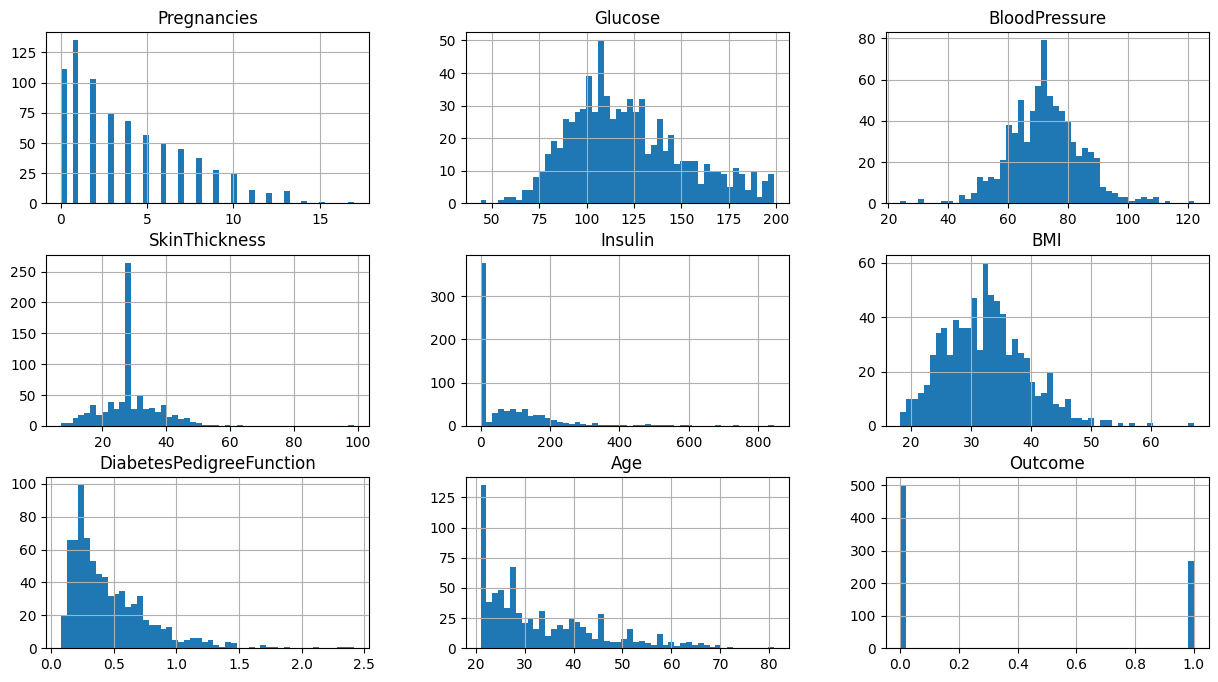

In [75]:
data2.hist(bins=50, figsize=(15,8))

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

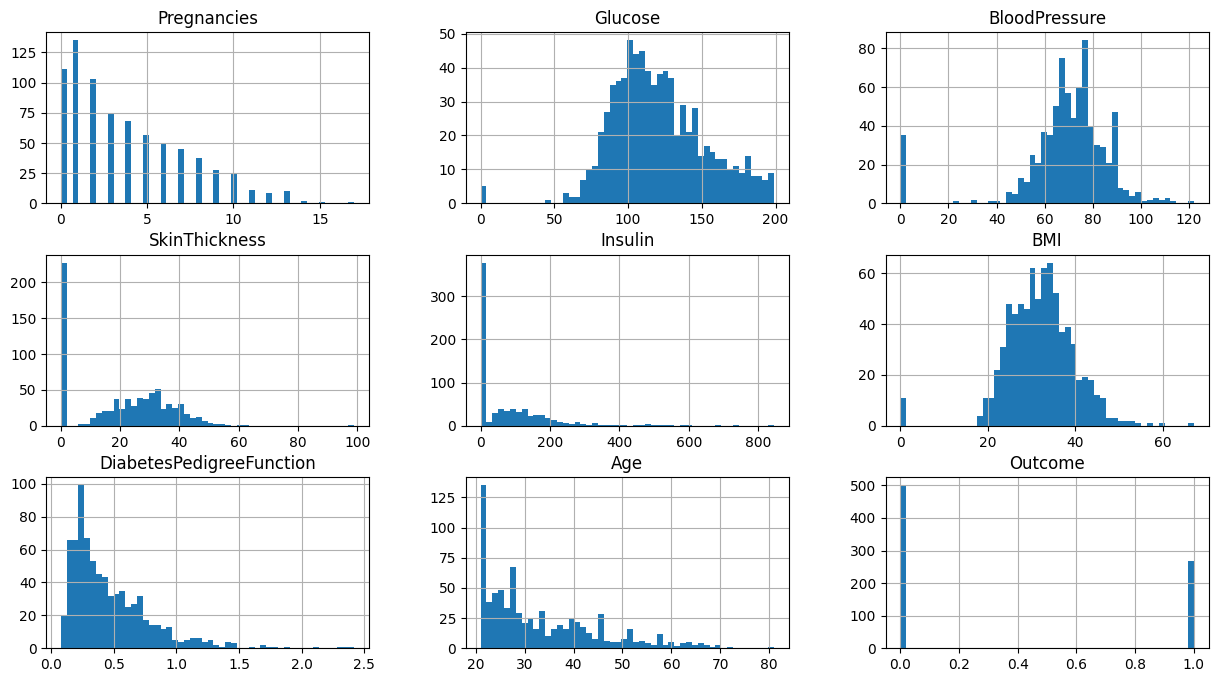

In [76]:
data.hist(bins=50, figsize=(15,8))

In [77]:
data.describe() # sin cambios

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [78]:
data2.describe() # cambiando 0 por la media

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,79.799479,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,115.244002,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Modelo predictivo sin modificar los datos. (data)


Distribución en y_train: Counter({0: 340, 1: 197})
Distribución en y_test: Counter({0: 160, 1: 71})


Accuracy del modelo: 0.79
Recall del modelo: 0.63
Precision del modelo: 0.67
F1-Score del modelo: 0.65

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       160
           1       0.67      0.63      0.65        71

    accuracy                           0.79       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.79      0.79      0.79       231



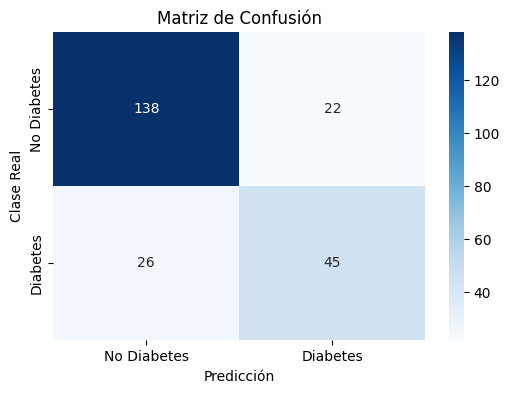

In [79]:
from collections import Counter

# Variables predictoras y objetivo
X = data.drop(columns=['Outcome'])  # Eliminar la columna de la salida
y = data['Outcome']                 # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, )

# Inspeccionar la distribución de las clases
print(f"Distribución en y_train: {Counter(y_train)}")
print(f"Distribución en y_test: {Counter(y_test)}")

print("\n")

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")

# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f"Recall del modelo: {recall:.2f}")

# Calcular precisión (precision)
precision = precision_score(y_test, y_pred)
print(f"Precision del modelo: {precision:.2f}")

# Calcular F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score del modelo: {f1:.2f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión')
plt.ylabel('Clase Real')
plt.xlabel('Predicción')
plt.show()

# Original.

---

In [80]:
# La variable objetivo es 'Outcome'
# Verificamos la distribución de los valores en la variable 'Outcome'
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

---

## Cross-validation

In [81]:
# Crear el modelo
model = LogisticRegression(max_iter=1000)

# Aplicar Cross-Validation (accuracy)
cv_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Accuracy promedio (CV): {cv_accuracy.mean():.2f} ± {cv_accuracy.std():.2f}")

# Aplicar Cross-Validation (recall)
cv_recall = cross_val_score(model, X, y, cv=5, scoring='recall')
print(f"Recall promedio (CV): {cv_recall.mean():.2f} ± {cv_recall.std():.2f}")

# Aplicar Cross-Validation (F1-score)
cv_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')
print(f"F1-Score promedio (CV): {cv_f1.mean():.2f} ± {cv_f1.std():.2f}")


Accuracy promedio (CV): 0.77 ± 0.02
Recall promedio (CV): 0.57 ± 0.05
F1-Score promedio (CV): 0.64 ± 0.03


---

# Modelo predictivo modificando los datos = 0. (data2)

In [82]:

data_sin_ceros = data2.copy()
data2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,79.799479,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,115.244002,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Accuracy del modelo: 0.81
Recall del modelo: 0.66
Precision del modelo: 0.71
F1-Score del modelo: 0.69

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       160
           1       0.71      0.66      0.69        71

    accuracy                           0.81       231
   macro avg       0.78      0.77      0.78       231
weighted avg       0.81      0.81      0.81       231



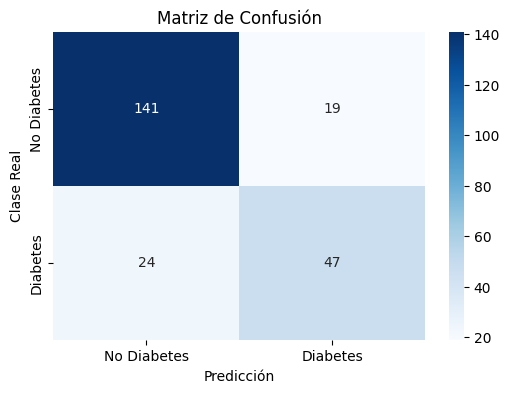

In [83]:

# Variables predictoras y objetivo
X = data2.drop(columns=['Outcome'])  # Eliminar la columna de la salida
y = data2['Outcome']                # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")


# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f"Recall del modelo: {recall:.2f}")


# Calcular precisión (precision)
precision = precision_score(y_test, y_pred)
print(f"Precision del modelo: {precision:.2f}")

# Calcular F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score del modelo: {f1:.2f}")


print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión')
plt.ylabel('Clase Real')
plt.xlabel('Predicción')
plt.show()

# Valores 0 sustituidos por la mediana.


### Balanceo

Accuracy del modelo: 0.77
Recall del modelo: 0.75
Precision del modelo: 0.61
F1-Score del modelo: 0.67

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       160
           1       0.61      0.75      0.67        71

    accuracy                           0.77       231
   macro avg       0.74      0.77      0.75       231
weighted avg       0.79      0.77      0.78       231



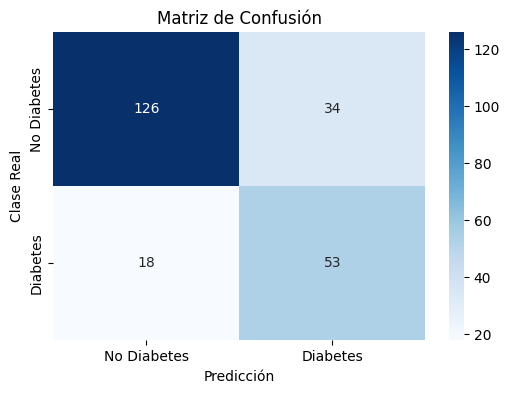

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data_balanceo = data2.copy()

# Variables predictoras y objetivo
X = data2.drop(columns=['Outcome'])  # Eliminar la columna de la salida
y = data2['Outcome']                # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Crear y entrenar el modelo con balanceo
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")

# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f"Recall del modelo: {recall:.2f}")

# Calcular precisión (precision)
precision = precision_score(y_test, y_pred)
print(f"Precision del modelo: {precision:.2f}")

# Calcular F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score del modelo: {f1:.2f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión')
plt.ylabel('Clase Real')
plt.xlabel('Predicción')
plt.show()

# Balanceo.

## Datos más correlacionados

- Glucose                     0.466581
- BMI                         0.292695
- Age                         0.238356
- Pregnancies                 0.221898
- DiabetesPedigreeFunction    0.173844
- Insulin                     0.130548


Accuracy del modelo: 0.77
Recall del modelo: 0.77
Precision del modelo: 0.60
F1-Score del modelo: 0.68

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       160
           1       0.60      0.77      0.68        71

    accuracy                           0.77       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.80      0.77      0.78       231



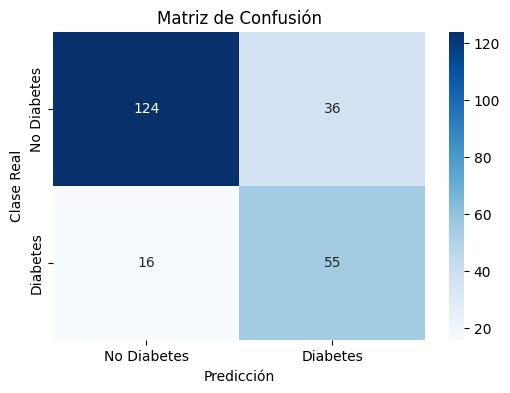

In [85]:
# Seleccionar solo las columnas relevantes
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']

# Variables predictoras y objetivo
X = data2[selected_features]  # Usar solo las columnas seleccionadas
y = data2['Outcome']          # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Crear y entrenar el modelo con balanceo
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")

# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f"Recall del modelo: {recall:.2f}")

# Calcular precisión (precision)
precision = precision_score(y_test, y_pred)
print(f"Precision del modelo: {precision:.2f}")

# Calcular F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score del modelo: {f1:.2f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión')
plt.ylabel('Clase Real')
plt.xlabel('Predicción')
plt.show()

# Data2 y solo las variables más correlaciondas.

Accuracy del modelo: 0.82
Recall del modelo: 0.66
Precision del modelo: 0.72
F1-Score del modelo: 0.69

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       160
           1       0.72      0.66      0.69        71

    accuracy                           0.82       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.81      0.82      0.82       231



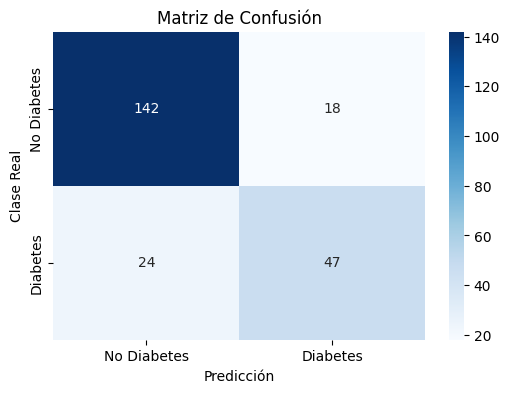

In [86]:
# Seleccionar solo las columnas relevantes
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']

# Variables predictoras y objetivo
X = data[selected_features]  # Usar solo las columnas seleccionadas
y = data['Outcome']          # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Crear y entrenar el modelo con balanceo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")

# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f"Recall del modelo: {recall:.2f}")

# Calcular precisión (precision)
precision = precision_score(y_test, y_pred)
print(f"Precision del modelo: {precision:.2f}")

# Calcular F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score del modelo: {f1:.2f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión')
plt.ylabel('Clase Real')
plt.xlabel('Predicción')
plt.show()

# Solo variables relevantes sin balanceo y con 0.

## Columnas más relevantes con los valores 0 no significativos sustituidos por la mediana.

Accuracy del modelo: 0.78
Recall del modelo: 0.83
Precision del modelo: 0.64
F1-Score del modelo: 0.73

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       100
           1       0.64      0.83      0.73        54

    accuracy                           0.78       154
   macro avg       0.77      0.79      0.77       154
weighted avg       0.81      0.78      0.78       154



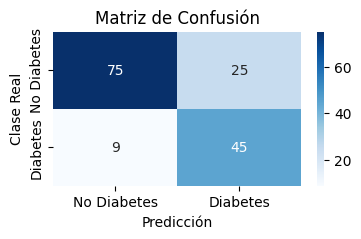

In [ ]:
# Seleccionar solo las columnas relevantes
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']

# Variables predictoras y objetivo
X = data_sin_ceros[selected_features]  # Usar solo las columnas seleccionadas
y = data_sin_ceros['Outcome']          # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo con balanceo
model = LogisticRegression(max_iter=200, class_weight='balanced')
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")

# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f"Recall del modelo: {recall:.2f}")

# Calcular precisión (precision)
precision = precision_score(y_test, y_pred)
print(f"Precision del modelo: {precision:.2f}")

# Calcular F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score del modelo: {f1:.2f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión')
plt.ylabel('Clase Real')
plt.xlabel('Predicción')
plt.show()

# Solo variables relevantes con balanceo y sin 0.



In [88]:
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin', 'Outcome']

# Crear un nuevo DataFrame con las columnas seleccionadas
data_preprocesado = data_sin_ceros[selected_features].copy()

data_preprocesado.describe()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,32.455208,33.240885,3.845052,0.471876,79.799479,0.348958
std,30.438286,6.875177,11.760232,3.369578,0.331329,115.244002,0.476951
min,44.000000,18.200000,21.000000,0.000000,0.078000,0.000000,0.000000
25%,99.750000,27.500000,24.000000,1.000000,0.243750,0.000000,0.000000
50%,117.000000,32.300000,29.000000,3.000000,0.372500,30.500000,0.000000
75%,140.250000,36.600000,41.000000,6.000000,0.626250,127.250000,1.000000
max,199.000000,67.100000,81.000000,17.000000,2.420000,846.000000,1.000000


In [89]:
data_preprocesado.head(10)

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,148,33.6,50,6,0.627,0,1
1,85,26.6,31,1,0.351,0,0
2,183,23.3,32,8,0.672,0,1
3,89,28.1,21,1,0.167,94,0
4,137,43.1,33,0,2.288,168,1
5,116,25.6,30,5,0.201,0,0
6,78,31.0,26,3,0.248,88,1
7,115,35.3,29,10,0.134,0,0
8,197,30.5,53,2,0.158,543,1
9,125,32.3,54,8,0.232,0,1


## Escalado

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


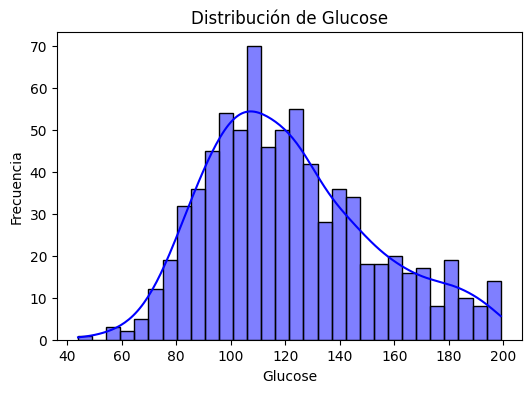

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


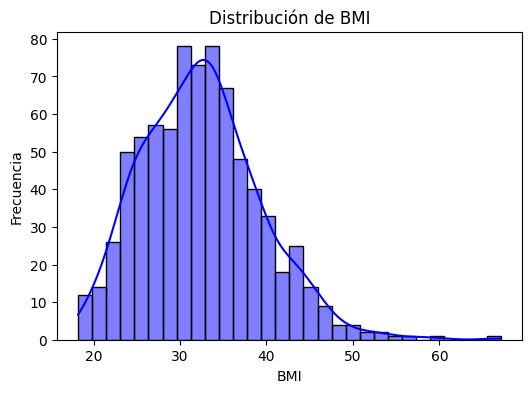

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


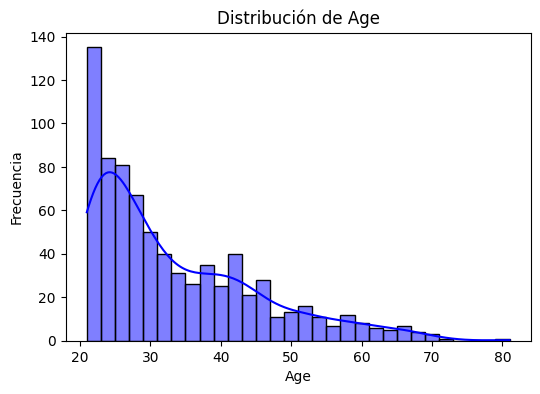

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


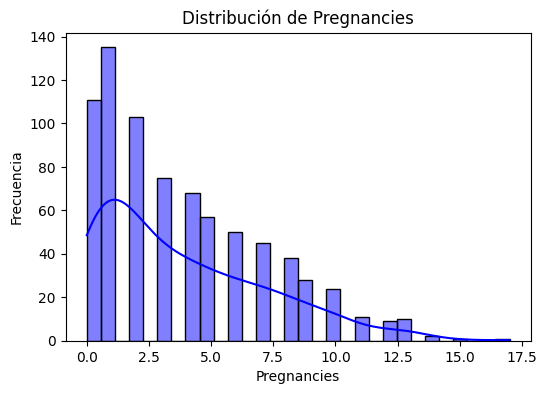

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


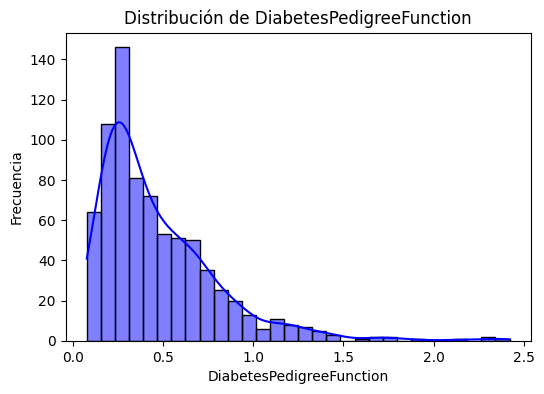

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


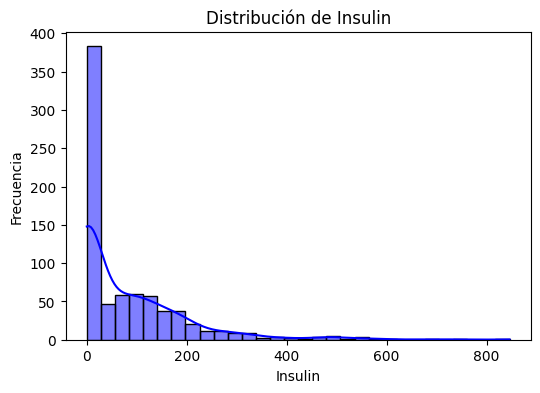

In [90]:
# Columnas a analizar
columnas_numericas = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']

# Visualizar la distribución de cada columna
for col in columnas_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_preprocesado[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [91]:
# Crear una copia del dataset
data_scaled = data_preprocesado.copy()

# Transformaciones para corregir asimetrías
data_scaled['Age'] = np.sqrt(data_scaled['Age'])  # Raíz cuadrada
data_scaled['Pregnancies'] = np.sqrt(data_scaled['Pregnancies'])  # Raíz cuadrada
data_scaled['DiabetesPedigreeFunction'] = np.log1p(data_scaled['DiabetesPedigreeFunction'])  # Logaritmo
data_scaled['Insulin'] = np.log1p(data_scaled['Insulin'])  # Logaritmo

# Escalar las columnas
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Escalado con StandardScaler
columns_standard = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'Insulin']
data_scaled[columns_standard] = scaler_standard.fit_transform(data_scaled[columns_standard])

# Escalado con MinMaxScaler
columns_minmax = ['DiabetesPedigreeFunction']
data_scaled[columns_minmax] = scaler_minmax.fit_transform(data_scaled[columns_minmax])

# Mostrar el resultado final
data_scaled.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,0.866045,0.166619,1.442365,0.765422,0.356534,-1.005417,1
1,-1.205066,-0.852200,-0.121795,-0.706001,0.195523,-1.005417,0
2,2.016662,-1.332500,-0.029098,1.150094,0.380165,-1.005417,1
3,-1.073567,-0.633881,-1.146865,-0.706001,0.068711,0.846769,0
4,0.504422,1.549303,0.062161,-1.721134,0.965907,1.081052,1


Accuracy: 0.74
Recall: 0.73
Precision: 0.60
F1-Score: 0.66

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       150
           1       0.60      0.73      0.66        81

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.74       231



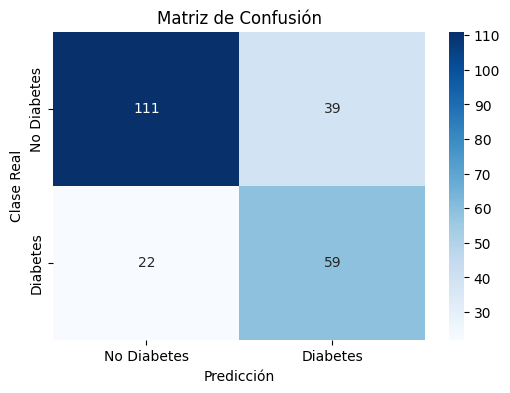

In [92]:
# --- División en entrenamiento y prueba ---
X = data_scaled.drop(columns=['Outcome'])  # Variables predictoras
y = data_scaled['Outcome']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

# --- Entrenamiento del modelo ---
model = LogisticRegression(max_iter=1000, class_weight='balanced',)  # Modelo con balanceo interno
model.fit(X_train, y_train)

# --- Predicción ---
y_pred = model.predict(X_test)

# --- Evaluación del modelo ---
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión')
plt.ylabel('Clase Real')
plt.xlabel('Predicción')
plt.show()

---

In [93]:
# Dataframe solo con las columnas más relevantes.
data_preprocesado.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,148,33.6,50,6,0.627,0,1
1,85,26.6,31,1,0.351,0,0
2,183,23.3,32,8,0.672,0,1
3,89,28.1,21,1,0.167,94,0
4,137,43.1,33,0,2.288,168,1


In [94]:
# DataFrame con los ceros tratados.
data2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,29,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---


## solve = liblinear - L1 - Solo para variables relevantes.

In [117]:
# Supón que 'data_preprocesado' es tu DataFrame y 'Outcome' es la variable objetivo
X = data_preprocesado.drop(columns=['Outcome'])  # Características
y = data_preprocesado['Outcome']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo de regresión logística con L1 y solver liblinear
model = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', max_iter=200)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Coeficientes del modelo
coef = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coeficiente'])
print("\nCoeficientes de las Variables:")
print(coef)


Accuracy: 0.7792
Precision: 0.6429
Recall: 0.8333
F1 Score: 0.7258

Matriz de Confusión:
[[75 25]
 [ 9 45]]

Coeficientes de las Variables:
                          Coeficiente
Glucose                      0.036497
BMI                          0.080479
Age                          0.012234
Pregnancies                  0.124243
DiabetesPedigreeFunction     0.665723
Insulin                     -0.001299


## solve = liblinear - L1 - Todas las variables

In [138]:
# Supón que 'data_preprocesado' es tu DataFrame y 'Outcome' es la variable objetivo
X = data2.drop(columns=['Outcome'])  # Características
y = data2['Outcome']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo de regresión logística con L1 y solver liblinear
model = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', max_iter=200)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


# Coeficientes del modelo
coef = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coeficiente'])
print("\nCoeficientes de las Variables:")
print(coef)


##### Actual #####

# test_size=0.2
# random_state=30
# stratify=y
# max_iter=200
# class_weight='balanced'
# solver='liblinear'
# penalty='l1'


Accuracy: 0.7922
Recall: 0.8519
Precision: 0.6571
F1 Score: 0.7419

Matriz de Confusión:
[[76 24]
 [ 8 46]]

Coeficientes de las Variables:
                          Coeficiente
Pregnancies                  0.126713
Glucose                      0.037192
BloodPressure               -0.012144
SkinThickness                0.014049
Insulin                     -0.001468
BMI                          0.075460
DiabetesPedigreeFunction     0.668188
Age                          0.014827


---

In [124]:
# Eliminar las columnas no necesarias
data_preprocesado_reducido = data2.drop(columns=['BloodPressure', 'SkinThickness', 'Insulin', 'Age'])

# Dividir los datos en características y variable objetivo
X_reducido = data_preprocesado_reducido.drop(columns=['Outcome'])
y = data_preprocesado['Outcome']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_reducido, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo de regresión logística con L1 y solver liblinear
model_reducido = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', max_iter=200)
model_reducido.fit(X_train, y_train)

# Predicciones
y_pred_reducido = model_reducido.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_reducido)
precision = precision_score(y_test, y_pred_reducido)
recall = recall_score(y_test, y_pred_reducido)
f1 = f1_score(y_test, y_pred_reducido)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_reducido))

# Reporte completo de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_reducido))

# Coeficientes del modelo
coef = pd.DataFrame(model_reducido.coef_.flatten(), index=X_reducido.columns, columns=['Coeficiente'])
print("\nCoeficientes de las Variables (Modelo Reducido):")
print(coef)


Accuracy: 0.7727
Precision: 0.6377
Recall: 0.8148
F1 Score: 0.7154

Matriz de Confusión:
[[75 25]
 [10 44]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       100
           1       0.64      0.81      0.72        54

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.80      0.77      0.78       154


Coeficientes de las Variables (Modelo Reducido):
                          Coeficiente
Pregnancies                  0.149566
Glucose                      0.035643
BMI                          0.076918
DiabetesPedigreeFunction     0.622367


---


## solve = L2

### solve = liblinear - L2 - Todas las variables

In [125]:
# Supón que 'data2' es tu DataFrame y 'Outcome' es la variable objetivo
X = data2.drop(columns=['Outcome'])  # Características
y = data2['Outcome']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo de regresión logística con L2 (Ridge) y solver liblinear
model_l2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2', max_iter=200)
model_l2.fit(X_train, y_train)

# Predicciones
y_pred_l2 = model_l2.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_l2)
precision = precision_score(y_test, y_pred_l2)
recall = recall_score(y_test, y_pred_l2)
f1 = f1_score(y_test, y_pred_l2)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_l2))

# Coeficientes del modelo
coef_l2 = pd.DataFrame(model_l2.coef_.flatten(), index=X.columns, columns=['Coeficiente'])
print("\nCoeficientes de las Variables (Modelo L2):")
print(coef_l2)

Accuracy: 0.7792
Precision: 0.6515
Recall: 0.7963
F1 Score: 0.7167

Matriz de Confusión:
[[77 23]
 [11 43]]

Coeficientes de las Variables (Modelo L2):
                          Coeficiente
Pregnancies                  0.125185
Glucose                      0.031554
BloodPressure               -0.025631
SkinThickness                0.010828
Insulin                     -0.001122
BMI                          0.051663
DiabetesPedigreeFunction     0.554684
Age                          0.011241


### solve = liblinear - L2 - Solo variables relevantes

In [126]:
# Eliminar las columnas no necesarias
data_preprocesado_reducido = data2.drop(columns=['BloodPressure', 'SkinThickness', 'Insulin', 'Age'])

# Dividir los datos en características y variable objetivo
X_reducido = data_preprocesado_reducido.drop(columns=['Outcome'])
y = data_preprocesado['Outcome']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_reducido, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo de regresión logística con L2 (Ridge) y solver liblinear
model_reducido_l2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2', max_iter=200)
model_reducido_l2.fit(X_train, y_train)

# Predicciones
y_pred_reducido_l2 = model_reducido_l2.predict(X_test)

# Métricas de evaluación
accuracy_l2 = accuracy_score(y_test, y_pred_reducido_l2)
precision_l2 = precision_score(y_test, y_pred_reducido_l2)
recall_l2 = recall_score(y_test, y_pred_reducido_l2)
f1_l2 = f1_score(y_test, y_pred_reducido_l2)

print(f"Accuracy (L2): {accuracy_l2:.4f}")
print(f"Precision (L2): {precision_l2:.4f}")
print(f"Recall (L2): {recall_l2:.4f}")
print(f"F1 Score (L2): {f1_l2:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión (L2):")
print(confusion_matrix(y_test, y_pred_reducido_l2))

# Reporte completo de clasificación
print("\nReporte de Clasificación (L2):")
print(classification_report(y_test, y_pred_reducido_l2))

# Coeficientes del modelo
coef_l2 = pd.DataFrame(model_reducido_l2.coef_.flatten(), index=X_reducido.columns, columns=['Coeficiente'])
print("\nCoeficientes de las Variables (Modelo L2):")
print(coef_l2)


Accuracy (L2): 0.7532
Precision (L2): 0.6111
Recall (L2): 0.8148
F1 Score (L2): 0.6984

Matriz de Confusión (L2):
[[72 28]
 [10 44]]

Reporte de Clasificación (L2):
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       100
           1       0.61      0.81      0.70        54

    accuracy                           0.75       154
   macro avg       0.74      0.77      0.74       154
weighted avg       0.78      0.75      0.76       154


Coeficientes de las Variables (Modelo L2):
                          Coeficiente
Pregnancies                  0.128332
Glucose                      0.028559
BMI                          0.043792
DiabetesPedigreeFunction     0.527192


---

In [158]:
# Supón que 'data_preprocesado' es tu DataFrame y 'Outcome' es la variable objetivo
X = data2.drop(columns=['Outcome'])  # Características
y = data2['Outcome']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo de regresión logística con L1 y solver liblinear
model = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


# Coeficientes del modelo
coef = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coeficiente'])
print("\nCoeficientes de las Variables:")
print(coef)


##### Actual #####

# test_size=0.2
# random_state=30
# stratify=y
# class_weight='balanced'
# solver='liblinear'
# penalty='l1'


Accuracy: 0.7922
Recall: 0.8519
Precision: 0.6571
F1 Score: 0.7419

Matriz de Confusión:
[[76 24]
 [ 8 46]]

Coeficientes de las Variables:
                          Coeficiente
Pregnancies                  0.126715
Glucose                      0.037189
BloodPressure               -0.012145
SkinThickness                0.014045
Insulin                     -0.001467
BMI                          0.075432
DiabetesPedigreeFunction     0.668289
Age                          0.014817


In [152]:
# Lista de posibles valores para C
C_values = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1]

# Evaluar el modelo con diferentes valores de C
for C in C_values:
    print(f"\nEntrenando con C={C}...")
    
    # Crear el modelo de regresión logística con el valor de C
    model_c = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', max_iter=200, C=C)
    
    # Entrenar el modelo
    model_c.fit(X_train, y_train)
    
    # Predicciones
    y_pred_c = model_c.predict(X_test)
    
    # Métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred_c)
    precision = precision_score(y_test, y_pred_c)
    recall = recall_score(y_test, y_pred_c)
    f1 = f1_score(y_test, y_pred_c)
    
    # Imprimir las métricas
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # # Matriz de confusión
    # print("\nMatriz de Confusión:")
    # print(confusion_matrix(y_test, y_pred_c))
    
    # Coeficientes del modelo
    # coef_c = pd.DataFrame(model_c.coef_.flatten(), index=X.columns, columns=['Coeficiente'])
    # print("\nCoeficientes de las Variables:")
    # print(coef_c)



Entrenando con C=0.01...
Accuracy: 0.6753
Recall: 0.7407
Precision: 0.5263
F1 Score: 0.6154

Entrenando con C=0.1...
Accuracy: 0.7208
Recall: 0.7593
Precision: 0.5775
F1 Score: 0.6560

Entrenando con C=0.2...
Accuracy: 0.7727
Recall: 0.7963
Precision: 0.6418
F1 Score: 0.7107

Entrenando con C=0.3...
Accuracy: 0.7792
Recall: 0.8148
Precision: 0.6471
F1 Score: 0.7213

Entrenando con C=0.4...
Accuracy: 0.7857
Recall: 0.8333
Precision: 0.6522
F1 Score: 0.7317

Entrenando con C=0.5...
Accuracy: 0.7857
Recall: 0.8333
Precision: 0.6522
F1 Score: 0.7317

Entrenando con C=0.6...
Accuracy: 0.7792
Recall: 0.8333
Precision: 0.6429
F1 Score: 0.7258

Entrenando con C=0.7...
Accuracy: 0.7792
Recall: 0.8333
Precision: 0.6429
F1 Score: 0.7258

Entrenando con C=0.8...
Accuracy: 0.7857
Recall: 0.8519
Precision: 0.6479
F1 Score: 0.7360

Entrenando con C=0.9...
Accuracy: 0.7857
Recall: 0.8519
Precision: 0.6479
F1 Score: 0.7360

Entrenando con C=1...
Accuracy: 0.7922
Recall: 0.8519
Precision: 0.6571
F1 Sco

In [ ]:
# Supón que 'data_preprocesado' es tu DataFrame y 'Outcome' es la variable objetivo
X = data2.drop(columns=['Outcome'])  # Características
y = data2['Outcome']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Crear y entrenar el modelo de regresión logística con L1 y solver liblinear
model = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1') 

# Validación cruzada (5 pliegues por defecto)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Imprimir las métricas de validación cruzada
print(f"Validación cruzada (accuracy en 5 pliegues): {cv_scores}")
print(f"Media de la validación cruzada: {cv_scores.mean():.4f}")
print(f"Desviación estándar de la validación cruzada: {cv_scores.std():.4f}")

# Entrenamos el modelo en todo el conjunto de entrenamiento para obtener las métricas finales
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy en conjunto de prueba: {accuracy:.4f}")
print(f"Recall en conjunto de prueba: {recall:.4f}")
print(f"Precision en conjunto de prueba: {precision:.4f}")
print(f"F1 Score en conjunto de prueba: {f1:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Coeficientes del modelo
coef = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coeficiente'])
print("\nCoeficientes de las Variables:")
print(coef)


Validación cruzada (accuracy en 5 pliegues): [0.71544715 0.70731707 0.77235772 0.7804878  0.77868852]
Media de la validación cruzada: 0.7509
Desviación estándar de la validación cruzada: 0.0324

Accuracy en conjunto de prueba: 0.7922
Recall en conjunto de prueba: 0.8519
Precision en conjunto de prueba: 0.6571
F1 Score en conjunto de prueba: 0.7419

Matriz de Confusión:
[[76 24]
 [ 8 46]]

Coeficientes de las Variables:
                          Coeficiente
Pregnancies                  0.126704
Glucose                      0.037191
BloodPressure               -0.012139
SkinThickness                0.014052
Insulin                     -0.001468
BMI                          0.075450
DiabetesPedigreeFunction     0.668140
Age                          0.014824


In [160]:

# Supón que 'data_preprocesado' es tu DataFrame y 'Outcome' es la variable objetivo
X = data2.drop(columns=['Outcome'])  # Características
y = data2['Outcome']  # Variable objetivo

# Crear el modelo de regresión logística con L1 y solver liblinear
model = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

# Realizar la validación cruzada sobre todo el conjunto de datos (5 pliegues por defecto)
cv_results = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)

# Imprimir las métricas de validación cruzada
print(f"Validación cruzada (accuracy en 5 pliegues): {cv_results['test_score']}")
print(f"Media de la validación cruzada: {cv_results['test_score'].mean():.4f}")
print(f"Desviación estándar de la validación cruzada: {cv_results['test_score'].std():.4f}")
print(f"Tiempo de entrenamiento en cada pliegue: {cv_results['fit_time']}")
print(f"Tiempo de predicción en cada pliegue: {cv_results['score_time']}")

# Entrenamos el modelo en todo el conjunto de datos para obtener las métricas finales
model.fit(X, y)

# Predicciones sobre el conjunto de datos completo (usando el modelo entrenado)
y_pred = model.predict(X)

# Métricas de evaluación en el conjunto de datos completo
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"\nAccuracy en conjunto de datos completo: {accuracy:.4f}")
print(f"Recall en conjunto de datos completo: {recall:.4f}")
print(f"Precision en conjunto de datos completo: {precision:.4f}")
print(f"F1 Score en conjunto de datos completo: {f1:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y, y_pred))

# Coeficientes del modelo
coef = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coeficiente'])
print("\nCoeficientes de las Variables:")
print(coef)


Validación cruzada (accuracy en 5 pliegues): [0.75974026 0.69480519 0.74025974 0.83006536 0.76470588]
Media de la validación cruzada: 0.7579
Desviación estándar de la validación cruzada: 0.0437
Tiempo de entrenamiento en cada pliegue: [0.00579739 0.00500703 0.00426817 0.004637   0.0039978 ]
Tiempo de predicción en cada pliegue: [0.00107932 0.00115871 0.00094175 0.00101709 0.00088024]

Accuracy en conjunto de datos completo: 0.7656
Recall en conjunto de datos completo: 0.7425
Precision en conjunto de datos completo: 0.6419
F1 Score en conjunto de datos completo: 0.6886

Matriz de Confusión:
[[389 111]
 [ 69 199]]

Coeficientes de las Variables:
                          Coeficiente
Pregnancies                  0.121148
Glucose                      0.038115
BloodPressure               -0.012706
SkinThickness                0.003050
Insulin                     -0.001457
BMI                          0.093969
DiabetesPedigreeFunction     0.902000
Age                          0.014117
